<a href="https://colab.research.google.com/github/Revbee/Basic-Model/blob/master/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Names of Contributors
#Ezekiel
#Anabel
#Stanley

#importing all packages needed
import pandas as pd 
import numpy as np 
!pip install researchpy
import researchpy as rp
import seaborn as sns 
import matplotlib.pyplot as plt

In [100]:
#importing data set
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data set.csv') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [101]:
###Data Engineering
##cleaning the Data

##selecting important variable gender, d_age, race, race_o, samerace, decision, decision_o, match
data = df[['gender', 'd_age', 'race', 'samerace', 'decision', 'decision_o', 'match']] 
data.head()

,gender,d_age,race,samerace,decision,decision_o,match
0,female,6,'Asian/Pacific Islander/Asian-American',0,1,0,0
1,female,1,'Asian/Pacific Islander/Asian-American',0,1,0,0
2,female,1,'Asian/Pacific Islander/Asian-American',1,1,1,1
3,female,2,'Asian/Pacific Islander/Asian-American',0,1,1,1
4,female,3,'Asian/Pacific Islander/Asian-American',0,1,1,1


In [102]:
##removing row with null and other
data = data[data.race != 'Other']
data = data[data.race != '?']
pd.crosstab(data['race'], data['decision'],  )

decision,0,1
race,,
'Asian/Pacific Islander/Asian-American',1068,914
'Black/African American',207,213
'Latino/Hispanic American',395,269
European/Caucasian-American,2884,1843


In [103]:
##regrouping the race and column
#changing Asian/percific Islander/Asian-America to Asian
#changing Black/African American to African
#changing European/Caucasian-American to Caucasian
#changing Latino/Hispanic American to Hispanic

data = data.replace({'race' : { "\'Asian/Pacific Islander/Asian-American\'" : 'Asian',
                        "\'Black/African American\'" : 'African', "\'Latino/Hispanic American\'" : 'Caucasian',
                        "European/Caucasian-American" : 'Hispanic'}})
data.groupby(['race']).size().reset_index(name='counts')

,race,counts
0,African,420
1,Asian,1982
2,Caucasian,664
3,Hispanic,4727


In [105]:
##creating new varaiable for H2
#defining a function to create the variable 
def gender_samerace(gender,samerace): 
    if gender == 'male':
      if samerace == 1:
        return 'male_srace'
      else: 
        return 'male_drace' 
    else:
      if samerace == 0:
        return 'female_srace'
      else:
        return 'female_drace'
#applying the funtion
#male_srace = belongs to male with a partner of same race
#male_drace = belongs to male with a partner of different race
#female_srace = belongs to female with a partner of same race
#female_drace = belongs to female with a partner of different race

data["gender_samerace"] = data.apply(lambda x: gender_samerace(x["gender"], x["samerace"]), axis = 1)
data['gender_samerace'].value_counts()

male_drace      2260
female_srace    2259
female_drace    1637
male_srace      1637
Name: gender_samerace, dtype: int64

In [106]:
#look of the refined data set
data.head()

,gender,d_age,race,samerace,decision,decision_o,match,gender_samerace
0,female,6,Asian,0,1,0,0,female_srace
1,female,1,Asian,0,1,0,0,female_srace
2,female,1,Asian,1,1,1,1,female_drace
3,female,2,Asian,0,1,1,1,female_srace
4,female,3,Asian,0,1,1,1,female_srace


In [ ]:
##investigating Hypothesis 1 (ethnic differences and choice of mate selection)

In [ ]:
#Descriptive Statistics

In [107]:
#each group of acceptance(1) and rejection(0) contains
data['match'].value_counts()


0    6530
1    1263
Name: match, dtype: int64

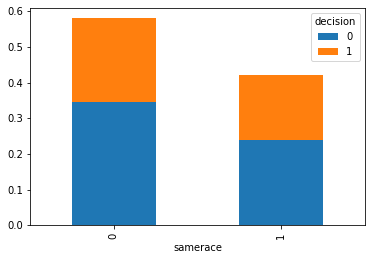

In [108]:
#creating a crosstab plot
pd.crosstab(data['samerace'], data['decision'], normalize = 'all').plot.bar(stacked=True)

In [ ]:
#chi-square analysis

In [109]:
#using researchpy to run a chi-square test and pandas to run the crosstab with all percentage
rp.crosstab(data['samerace'], data['decision'],  test = "chi-square", expected_freqs = True) 
crtb, test, expt = rp.crosstab(data['samerace'], data['decision'], test = "chi-square", expected_freqs = True)
#crosstabulation with percentage
pd.crosstab(data['samerace'], data['decision'], normalize = 'all', margins = True)

decision,0,1,All
samerace,,,
0,0.346465,0.233415,0.579879
1,0.237906,0.182215,0.420121
All,0.584371,0.415629,1.000000


In [110]:
#cross tabulation with count
crtb

decision            
decision        0     1   All
samerace                     
0            2700  1819  4519
1            1854  1420  3274
All          4554  3239  7793

In [111]:
#chi-square test
test
#result : there is a significant association between same race and choice of mate selection since p-value>0.05

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,7.6079
1,p-value =,0.0058
2,Cramer's phi =,0.0312


In [112]:
#expected count
round(expt,2)

decision         
decision        0        1
samerace                  
0         2640.77  1878.23
1         1913.23  1360.77

In [ ]:
##investigating Hypothesis 2 (ethnic differences and choice of mate selection)
#Descriptive Statistics

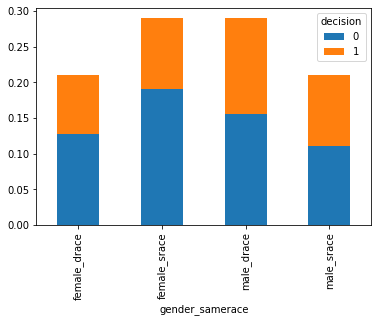

In [113]:
#creating a crosstab plot
pd.crosstab(data['gender_samerace'], data['decision'], normalize = 'all', ).plot.bar(stacked=True, )
#Key
#male_srace = belongs to male with a partner of same race
#male_drace = belongs to male with a partner of different race
#female_srace = belongs to female with a partner of same race
#female_drace = belongs to female with a partner of different race

In [ ]:
#chi-square analysis

In [114]:
#using researchpy to run a chi-square test and pandas to run the crosstab with all percentage
rp.crosstab(data['gender_samerace'], data['decision'],  test = "chi-square", expected_freqs = True) 
crtb, test, expt = rp.crosstab(data['gender_samerace'], data['decision'], test = "chi-square", expected_freqs = True)
#cross tabulation with percentage
pd.crosstab(data['gender_samerace'], data['decision'], normalize = 'all', margins = True)


decision,0,1,All
gender_samerace,,,
female_drace,0.127422,0.082638,0.210060
female_srace,0.190299,0.099577,0.289876
male_drace,0.156166,0.133838,0.290004
male_srace,0.110484,0.099577,0.210060
All,0.584371,0.415629,1.000000


In [115]:
#cross tabulation with count
crtb

decision            
decision               0     1   All
gender_samerace                     
female_drace         993   644  1637
female_srace        1483   776  2259
male_drace          1217  1043  2260
male_srace           861   776  1637
All                 4554  3239  7793

In [116]:
#chi-Square test
test
#there is a significant association between gender-race differences and choice of mate selection since p-value>0.05

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,94.2748
1,p-value =,0.0000
2,Cramer's V =,0.1100


In [117]:
#expected count
round(expt,2)

decision        
decision               0       1
gender_samerace                 
female_drace      956.61  680.39
female_srace     1320.09  938.91
male_drace       1320.68  939.32
male_srace        956.61  680.39